<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/forecasting_feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

# Load the temperature dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url,index_col='Date',parse_dates=True)

In [133]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [134]:
#checking if date is in datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


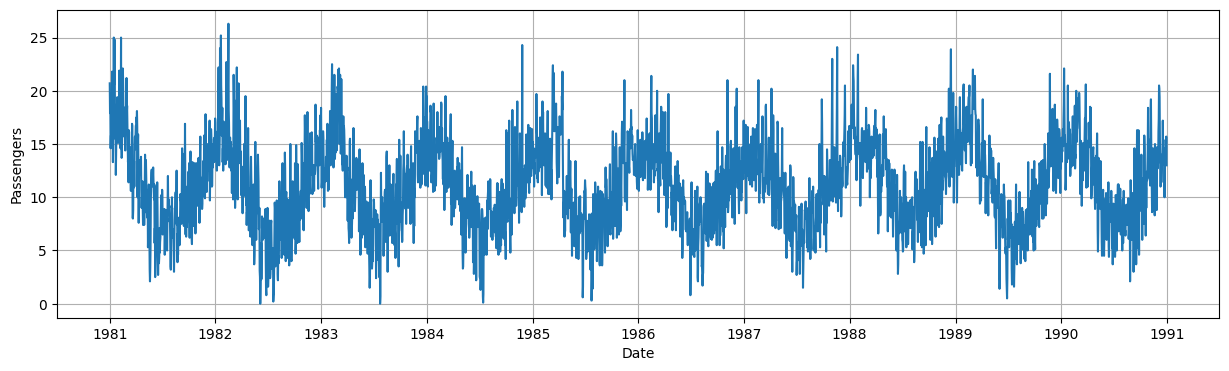

In [135]:
#check for trends
plt.figure(figsize=(15,4))
plt.plot(df.index,df['Temp'])
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [136]:
#lag
df['lag_1']=df['Temp'].shift(1)
df['lag_2']=df['Temp'].shift(2)
df['lag_3']=df['Temp'].shift(3)
df['lag_4']=df['Temp'].shift(4)
df['lag_5']=df['Temp'].shift(5)
df['lag_6']=df['Temp'].shift(6)
df['lag_7']=df['Temp'].shift(7)
df['lag_8']=df['Temp'].shift(8)
df['lag_9']=df['Temp'].shift(9)
df['lag_10']=df['Temp'].shift(10)
df['lag_11']=df['Temp'].shift(11)
df['lag_12']=df['Temp'].shift(12)

#rolling feature
df['rolling_3_mean']=df['Temp'].rolling(window=3).mean()
df['rolling_3_std']=df['Temp'].rolling(window=3).std()



#time based feature
df['dayofweek']=df.index.dayofweek
df['is_weekend']=(df.index.dayofweek>=5).astype(int)
df['month']=df.index.month
df['quarter']=df.index.quarter

#yearly seasonality
df['dayofyear'] = df.index.dayofyear
df['sin_doy'] = np.sin(2 * np.pi * df['dayofyear']/365)
df['cos_doy'] = np.cos(2 * np.pi * df['dayofyear']/365)


In [137]:
#after adding the lag, remove the null value rows
df.dropna(inplace=True)

In [138]:
df.head()

,Temp,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_12,rolling_3_mean,rolling_3_std,dayofweek,is_weekend,month,quarter,dayofyear,sin_doy,cos_doy
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-13,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,...,20.7,15.400000,1.835756,1,0,1,1,13,0.221922,0.975065
1981-01-14,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,...,17.9,17.166667,4.119871,2,0,1,1,14,0.238673,0.971100
1981-01-15,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,...,18.8,21.066667,4.166933,3,0,1,1,15,0.255353,0.966848
1981-01-16,20.7,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,...,14.6,22.400000,2.286919,4,0,1,1,16,0.271958,0.962309
1981-01-17,20.6,20.7,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,...,15.8,22.100000,2.511971,5,1,1,1,17,0.288482,0.957485


In [140]:
# spliting data on the last 12 months as test data
train = df.iloc[:-12]
test = df.iloc[-12:]

features = ['lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_8','lag_9','lag_10','lag_11','lag_12','rolling_3_mean','rolling_3_std','dayofweek','is_weekend','month','quarter','dayofyear','sin_doy','cos_doy']
target = ['Temp']
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [141]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
model = LGBMRegressor()
model.fit(
    X_train, y_train,


)
# Predict
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}, MAE: {mae:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3680
[LightGBM] [Info] Number of data points in the train set: 3626, number of used features: 21
[LightGBM] [Info] Start training from score 11.149421
📉 RMSE: 0.31, MAE: 0.25


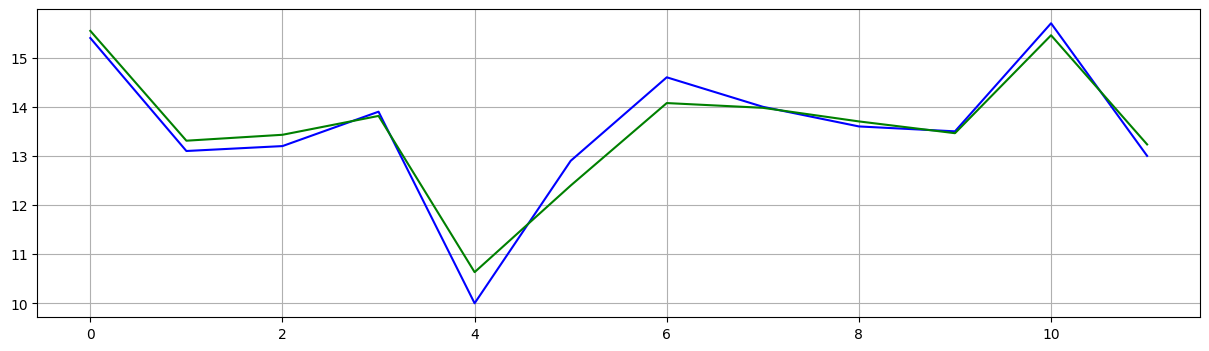

In [142]:
#evaluation plot
plt.figure(figsize=(15,4))
plt.plot(y_test.values,label='Actual',color='blue')
plt.plot(y_pred,label='Predicted',color='green')
plt.grid(True)
plt.show()